# Data 1: SDU@AAAI-21 

## Overall

In [106]:
import json

filename = 'data/data1/diction.json'
with open(filename, 'r') as file:
    data = json.load(file)

### Data example

In [109]:
data

{'MDC': ['metering data collector',
  'mobile data challenge',
  'multiple description coding'],
 'SVM': ['support vector machine', 'state vector machine'],
 'MER': ['maximum entropy regularizer',
  'music emotion research',
  'music emotion recognition'],
 'SVC': ['support vector classifier', 'scalable video coding'],
 'CNN': ['convolutional neural network',
  'condensed nearest neighbor',
  'complicated neural networks',
  'citation nearest neighbour'],
 'FEC': ['forward error correction', 'federal election candidate'],
 'FSM': ['finite state machine', 'fast sweeping method'],
 'LDA': ['latent dirichlet allocation', 'linear discriminant analysis'],
 'FR': ['frame recall', 'faster r - cnn', 'fooling rate'],
 'TF': ['term frequency',
  'trend filtering',
  'tensor factorization',
  'transcription factor'],
 'SS': ['speech synthesis',
  'single stage',
  'stochastic search',
  'social status',
  'spectrum sensing',
  'severe sepsis',
  'scheduled sampling',
  'secondary structure',
  's

### Number of Acronyms

In [108]:
len(data)

732

### Number of word senses per acronym

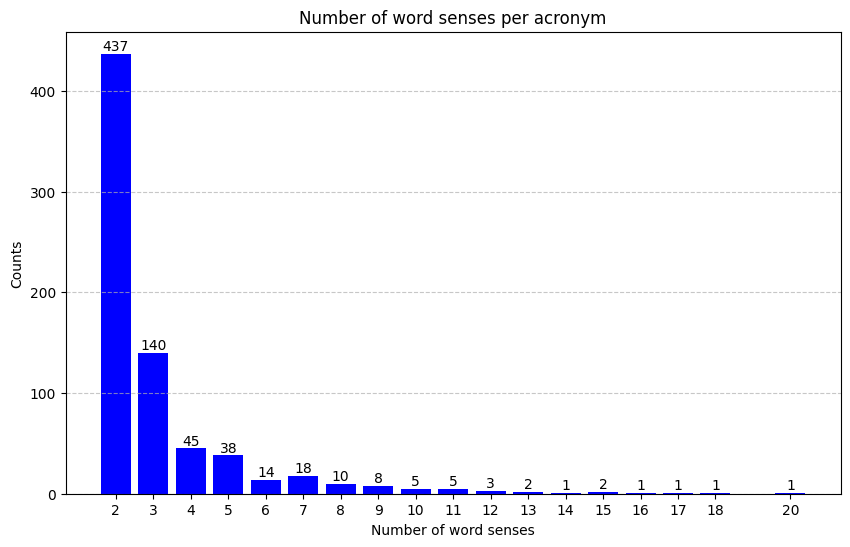

In [46]:
value_number_list = [len(value) for key, value in data.items()]
from collections import Counter
value_number_dict = Counter(value_number_list)

# Plot the number
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.bar(value_number_dict.keys(), value_number_dict.values(), color='blue')
plt.xlabel('Number of word senses')
plt.ylabel('Counts')
plt.title('Number of word senses per acronym')
plt.xticks(list(value_number_dict.keys()))  # Ensure all labels are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

Below acronym has 20 word senses. Let's print out what word senses are.

In [10]:
def get_key_value(data, number):
    for key, value in data.items():
        if len(value) == number:
            print (key, value)
            
get_key_value(data, 20)

CS ['computer systems', 'computer science', 'clonal selection', 'connection size', 'computational science', 'centralized solution', 'compressive sensing', 'core semantics', 'coordinated scheduling', 'charging station', 'constraint solver', 'conventional sparsity', 'compressed sensing', 'critical section', 'common subset', 'content store', 'case - sensitive', 'consensus score', 'code - switching', 'cluster - specific']


## Training data

In [110]:
filename = 'data/data1/train.json'
with open(filename, 'r') as file:
    train_data = json.load(file)

print (len(train_data))

50034


In [17]:
train_data[0]

{'acronym': 20,
 'expansion': 'secrecy rate',
 'id': 'TR-0',
 'tokens': ['In',
  'summary',
  ',',
  'it',
  'is',
  'evident',
  'that',
  'their',
  'complexities',
  'are',
  'in',
  'increasing',
  'order',
  ':',
  'leakage',
  '-',
  'based',
  ',',
  'Max',
  '-',
  'SR',
  ',',
  'and',
  'generalized',
  'EDAS',
  '.']}

### Number of Acronyms

In [25]:
from collections import Counter
train_word_sense_dict = {}
for item in train_data:
    acr = item['tokens'][item['acronym']]
    word_sense = item['expansion']
    if train_word_sense_dict.get(acr):
        train_word_sense_dict[acr][word_sense] += 1
    else:
        train_word_sense_dict[acr] = Counter()
        train_word_sense_dict[acr][word_sense] = 1

print (len(train_word_sense_dict))

731


### Number of sentences per word sense

In [111]:
no_sentence_per_word_sense = []
for acy, counter in train_word_sense_dict.items():
    no_sentence_per_word_sense.extend(counter.values())

no_sentence_per_word_sense = Counter(no_sentence_per_word_sense)
no_sentence_per_word_sense = {k: no_sentence_per_word_sense[k] for k in sorted(no_sentence_per_word_sense)}
no_sentence_per_word_sense

{1: 338,
 2: 287,
 3: 178,
 4: 134,
 5: 124,
 6: 80,
 7: 69,
 8: 68,
 9: 45,
 10: 55,
 11: 41,
 12: 41,
 13: 39,
 14: 23,
 15: 20,
 16: 19,
 17: 21,
 18: 16,
 19: 17,
 20: 13,
 21: 13,
 22: 17,
 23: 11,
 24: 17,
 25: 18,
 26: 14,
 27: 12,
 28: 14,
 29: 15,
 30: 11,
 31: 16,
 32: 10,
 33: 20,
 34: 17,
 35: 10,
 36: 6,
 37: 5,
 38: 10,
 39: 6,
 40: 5,
 41: 10,
 42: 8,
 43: 8,
 44: 8,
 45: 4,
 46: 1,
 47: 5,
 48: 5,
 49: 3,
 50: 6,
 51: 4,
 52: 5,
 53: 5,
 54: 3,
 55: 3,
 56: 2,
 57: 2,
 58: 3,
 59: 4,
 60: 3,
 61: 4,
 62: 7,
 63: 4,
 64: 2,
 65: 2,
 66: 1,
 67: 6,
 68: 2,
 69: 2,
 70: 1,
 72: 3,
 73: 3,
 74: 3,
 75: 2,
 76: 4,
 77: 3,
 78: 3,
 79: 6,
 81: 6,
 82: 4,
 83: 3,
 84: 2,
 85: 1,
 86: 4,
 87: 2,
 88: 1,
 89: 2,
 90: 2,
 91: 2,
 93: 3,
 95: 1,
 96: 2,
 97: 2,
 98: 2,
 101: 3,
 102: 2,
 104: 1,
 105: 2,
 106: 3,
 108: 1,
 110: 2,
 111: 1,
 114: 1,
 115: 3,
 117: 1,
 118: 3,
 119: 1,
 121: 1,
 122: 2,
 123: 2,
 125: 1,
 128: 1,
 137: 1,
 138: 2,
 142: 1,
 143: 1,
 146: 1,
 147: 1,

There are 338 word senses only have 1 sentence.

Let's check which word sense has 1064 sentences.

In [35]:
def get_key_value(data, number):
    for acr, counter in data.items():
        for word_sense, value in counter.items():
            if value == number:
                print (acr, word_sense, value)
            
get_key_value(train_word_sense_dict, 1064)

for item in train_data:
    if item['tokens'][item['acronym']] == 'DCP' and item['expansion'] == 'deep context prediction':
        print (item['tokens'])

RNN recurrent neural network 1064


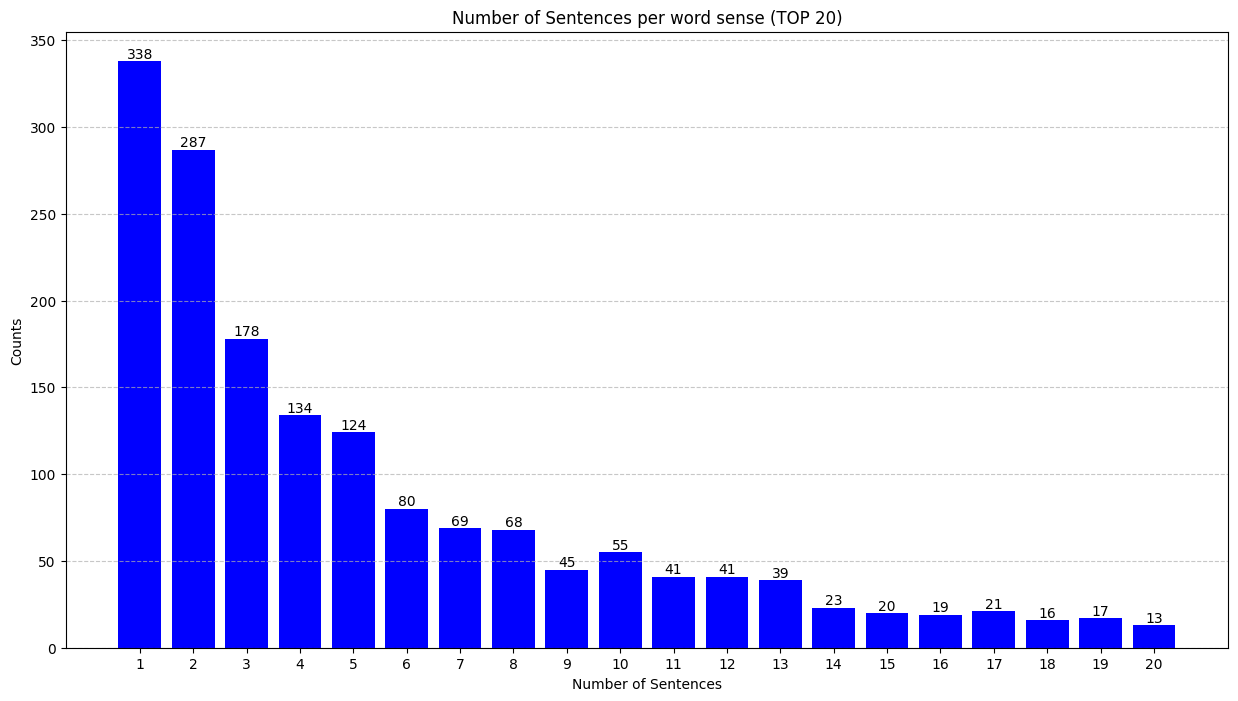

In [112]:
# Plot the number
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 8))
bars = plt.bar(list(no_sentence_per_word_sense.keys())[:20], list(no_sentence_per_word_sense.values())[:20], color='blue')
plt.xlabel('Number of Sentences')
plt.ylabel('Counts')
plt.title('Number of Sentences per word sense (TOP 20)')
plt.xticks(list(no_sentence_per_word_sense.keys())[:20])  # Ensure all labels are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

### Length of sentences

In [66]:
len_seq_dict = Counter([len(item['tokens']) for item in train_data])
print (f"max length:{max(len_seq_dict.keys())}; min length:{min(len_seq_dict.keys())}")
len_seq_dict = dict(sorted(len_seq_dict.items(), key=lambda item: item[0], reverse=True))

max length:1191; min length:2


In [70]:
for item in train_data:
    if len(item['tokens']) == 2:
        print (item)

{'acronym': 0, 'expansion': 'principal component analysis', 'id': 'TR-1691', 'tokens': ['PCA', '.']}
{'acronym': 0, 'expansion': 'support vector machine', 'id': 'TR-3074', 'tokens': ['SVM', '.']}
{'acronym': 0, 'expansion': 'massively parallel computation', 'id': 'TR-6170', 'tokens': ['MPC', '.']}
{'acronym': 0, 'expansion': 'artificial intelligence', 'id': 'TR-7240', 'tokens': ['AI', '.']}
{'acronym': 0, 'expansion': 'artificial intelligence', 'id': 'TR-13766', 'tokens': ['AI', '.']}


# Data 2: Anonymized Clinical Abbreviations and Acronyms 

### Number of data

In [86]:
data2_path = "data/data2/AnonymizedClinicalAbbreviationsAndAcronymsDataSet.txt"
with open(data2_path, 'r', encoding='utf-8', errors='ignore') as file:
    content = file.readlines()
len(content)

37500

### Data example

In [90]:
data = []
for item in content:
    split_item = item.split('|')
    data.append((split_item[0], split_item[1], split_item[-1]))
print (data[0:2])

[('AB', 'abortion', '_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida 3, para 2-0-0-2, who presented to the Emergency Room complaining of increasing vaginal bleeding since approximately 6 a.m. The patient does have a known history of having had a missed AB. She had been followed at another clinic and was told that she had a missed AB shortly after Christmas. The patient at that time had been counseled to undergo a D&C and was even offered misoprostol to help complete a miscarriage, however, patient declined at that time to schedule a D&C or to take the misoprostol.\n'), ('AB', 'abortion', 'She is now bleeding quite heavily. Ultrasound this morning demonstrated a missed AB consistent with a 6 week pregnancy with blood clots in the uterine cavity, as well as continued bleeding from the cervical os. This is consistent with an incomplete AB. The patient presents now for a suction D&C. Medical history is negative. Surgical history is negative. CURRENT MEDICATIONS: Include prenatal vitamins.\n

### Number of acronyms

In [102]:
from collections import Counter
data2_acronym_dict = Counter([item[0] for item in data])
# print (data2_acronym_dict)
print (len(data2_acronym_dict))

75


### Number of word sense per acronym

In [96]:
word_sense_dict = {}
for item in data:
    if word_sense_dict.get(item[0]):
        word_sense_dict[item[0]][item[1]] += 1
    else:
        word_sense_dict[item[0]] = Counter()
        word_sense_dict[item[0]][item[1]] = 1
print (word_sense_dict) 

{'AB': Counter({'abortion': 345, 'blood group in ABO system': 137, 'type A, type B': 8, 'atrioventricular:AV': 2, 'ankle-brachial': 1, 'arteriovenous:AV': 1, 'X-ray finding': 1, 'MISTAKE:abduction': 1, 'antipyrine benzocaine': 1, 'arterial blood': 1, 'UNSURED SENSE': 1, 'NAME': 1}), 'VBG': Counter({'vertical banded gastroplasty': 299, 'venous blood gas': 201}), 'AC': Counter({'(drug) AC': 161, 'acromioclavicular': 158, 'adriamycin cyclophosphamide': 118, 'before meals': 42, 'assist control': 9, 'acetate': 4, 'angiotensin-converting enzyme:ACE': 3, 'abdominal circumference': 2, 'alternating current': 1, 'anticoagulation': 1, 'antecubital': 1}), 'ALD': Counter({'ad lib on demand': 407, 'adrenoleukodystrophy': 88, 'alanine aminotransferase:ALT': 3, 'left anterior descending:LAD': 1, 'acetyl lysergic acid diethylamide': 1}), 'AMA': Counter({'against medical advice': 444, 'advanced maternal age': 31, 'antimitochondrial antibody': 25}), 'ASA': Counter({'acetylsalicylic acid': 404, 'American 

Counter({5: 12, 4: 12, 3: 11, 6: 10, 2: 9, 8: 7, 7: 3, 9: 3, 12: 2, 10: 2, 11: 1, 1: 1, 14: 1, 15: 1})


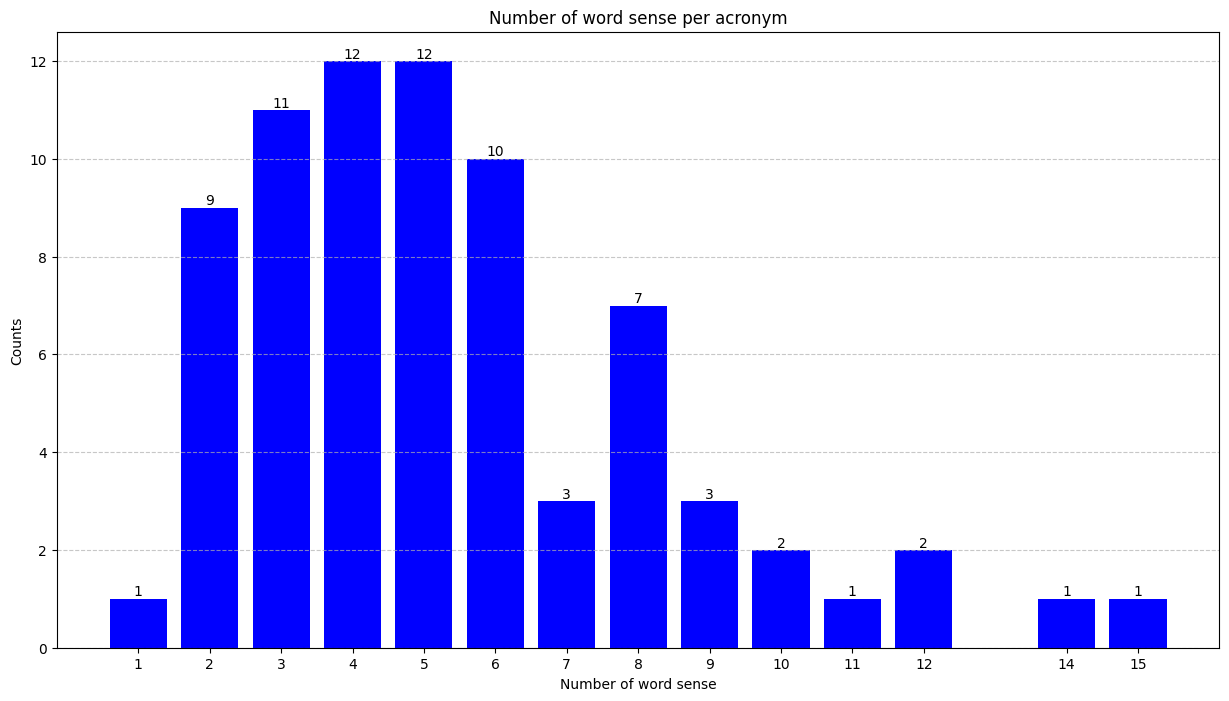

In [103]:
no_word_sense_per_acronym = []
for key, value in word_sense_dict.items():
    no_word_sense_per_acronym.append(len(value))
no_word_sense_per_acronym = Counter(no_word_sense_per_acronym)
print (no_word_sense_per_acronym)

# Plot the number
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 8))
bars = plt.bar(list(no_word_sense_per_acronym.keys()), list(no_word_sense_per_acronym.values()), color='blue')
plt.xlabel('Number of word sense')
plt.ylabel('Counts')
plt.title('Number of word sense per acronym')
plt.xticks(list(no_word_sense_per_acronym.keys()))  # Ensure all labels are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

### Number of sentences per word sense

In [104]:
no_sentences_per_word_sense = []
for acronym, value in word_sense_dict.items():
    for word_sense, no_sentences in value.items():
        no_sentences_per_word_sense.append(no_sentences)
no_sentences_per_word_sense = Counter(no_sentences_per_word_sense)
print (no_sentences_per_word_sense)

Counter({1: 106, 2: 42, 3: 23, 4: 13, 5: 12, 6: 8, 8: 6, 7: 5, 14: 5, 31: 4, 11: 4, 88: 3, 25: 3, 103: 3, 36: 3, 16: 3, 439: 3, 345: 2, 137: 2, 9: 2, 444: 2, 93: 2, 457: 2, 47: 2, 231: 2, 105: 2, 225: 2, 53: 2, 396: 2, 41: 2, 336: 2, 34: 2, 469: 2, 30: 2, 176: 2, 275: 2, 394: 2, 40: 2, 308: 2, 57: 2, 55: 2, 12: 2, 138: 2, 83: 2, 299: 1, 201: 1, 161: 1, 158: 1, 118: 1, 42: 1, 407: 1, 404: 1, 381: 1, 374: 1, 116: 1, 43: 1, 343: 1, 157: 1, 456: 1, 459: 1, 434: 1, 249: 1, 243: 1, 261: 1, 391: 1, 270: 1, 453: 1, 28: 1, 100: 1, 222: 1, 278: 1, 62: 1, 436: 1, 152: 1, 282: 1, 462: 1, 286: 1, 209: 1, 129: 1, 23: 1, 45: 1, 448: 1, 18: 1, 289: 1, 200: 1, 449: 1, 51: 1, 265: 1, 446: 1, 19: 1, 472: 1, 461: 1, 38: 1, 102: 1, 500: 1, 58: 1, 48: 1, 188: 1, 426: 1, 134: 1, 107: 1, 179: 1, 314: 1, 418: 1, 82: 1, 207: 1, 279: 1, 123: 1, 377: 1, 474: 1, 10: 1, 438: 1, 121: 1, 466: 1, 32: 1, 212: 1, 61: 1, 111: 1, 294: 1, 361: 1, 409: 1, 408: 1, 89: 1, 423: 1, 74: 1, 141: 1, 252: 1, 455: 1, 22: 1, 21: 1, 6

There are 106 word senses having 1 sentence.

### Length of sentences per word sense

In [101]:
sentence_len_per_word_sense = Counter([len(item[2]) for item in data])
# print (data2_sentence_dict)
print (f"max length:{max(sentence_len_per_word_sense.keys())}; min length:{min(sentence_len_per_word_sense.keys())}")

max length:2708; min length:93


The maximum sentence length for one word sense is 2708 long, the shortest is 93 long.